In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from plotly.subplots import make_subplots
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import random
from sklearn import datasets
from sklearn.metrics import r2_score , mean_squared_error
from sklearn import svm

In [245]:
data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

# Exploratory Data Analysis

In [246]:
df = pd.DataFrame(data)
df

Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_with_overweight       FAF       TUE  \
0      no    no  2.000000                            yes  0.000000  1.000000   
1     yes   yes  3.000000                            yes  3.000000  0.000000   
2      no    no  2.000000                            yes  2.000000  1.000000   
3      no    no  2.000000                             no  2.000000  0.000000   
4      no    no  2.000000                             no  0.000000  0.000000   
...   ...   ...       ...                            ...       ...       ...   
2106   no    no  1.728139                            yes  1.676269  0.906247   
2107   no    no  2.005130                            yes  1.341390  0.599270   
2108   no    no  2.054193                            yes  1.414209  0.646288   
2109   no    no  2.852339                            yes  1.139107  0.586035   
2110   no    no  2.863513                            yes  1.026452  0.714137   

           CAEC                 MTRANS           NObeyesdad  
0     Sometimes  Public_Transportation        Normal_Weight  
1     Sometimes  Public_Transportation        Normal_Weight  
2     Sometimes  Public_Transportation        Normal_Weight  
3     Sometimes                Walking   Overweight_Level_I  
4     Sometimes  Public_Transportation  Overweight_Level_II  
...         ...                    ...                  ...  
2106  Sometimes  Public_Transportation     Obesity_Type_III  
2107  Sometimes  Public_Transportation     Obesity_Type_III  
2108  Sometimes  Public_Transportation     Obesity_Type_III  
2109  Sometimes  Public_Transportation     Obesity_Type_III  
2110  Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [247]:
df.info

<bound method DataFrame.info of             Age  Gender    Height      Weight        CALC FAVC  FCVC  NCP  \
0     21.000000  Female  1.620000   64.000000          no   no   2.0  3.0   
1     21.000000  Female  1.520000   56.000000   Sometimes   no   3.0  3.0   
2     23.000000    Male  1.800000   77.000000  Frequently   no   2.0  3.0   
3     27.000000    Male  1.800000   87.000000  Frequently   no   3.0  3.0   
4     22.000000    Male  1.780000   89.800000   Sometimes   no   2.0  1.0   
...         ...     ...       ...         ...         ...  ...   ...  ...   
2106  20.976842  Female  1.710730  131.408528   Sometimes  yes   3.0  3.0   
2107  21.982942  Female  1.748584  133.742943   Sometimes  yes   3.0  3.0   
2108  22.524036  Female  1.752206  133.689352   Sometimes  yes   3.0  3.0   
2109  24.361936  Female  1.739450  133.346641   Sometimes  yes   3.0  3.0   
2110  23.664709  Female  1.738836  133.472641   Sometimes  yes   3.0  3.0   

      SCC SMOKE      CH2O family_history_wi

In [248]:
df.shape

(2111, 17)

In [249]:
df.head()

Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [250]:
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [251]:
categorical_features = ['Gender','CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
continuous_features = ['Age', 'Height', 'Weight','FCVC', "NCP", 'CH2O' ,'FAF', 'TUE']

In [252]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [253]:
df.dtypes

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



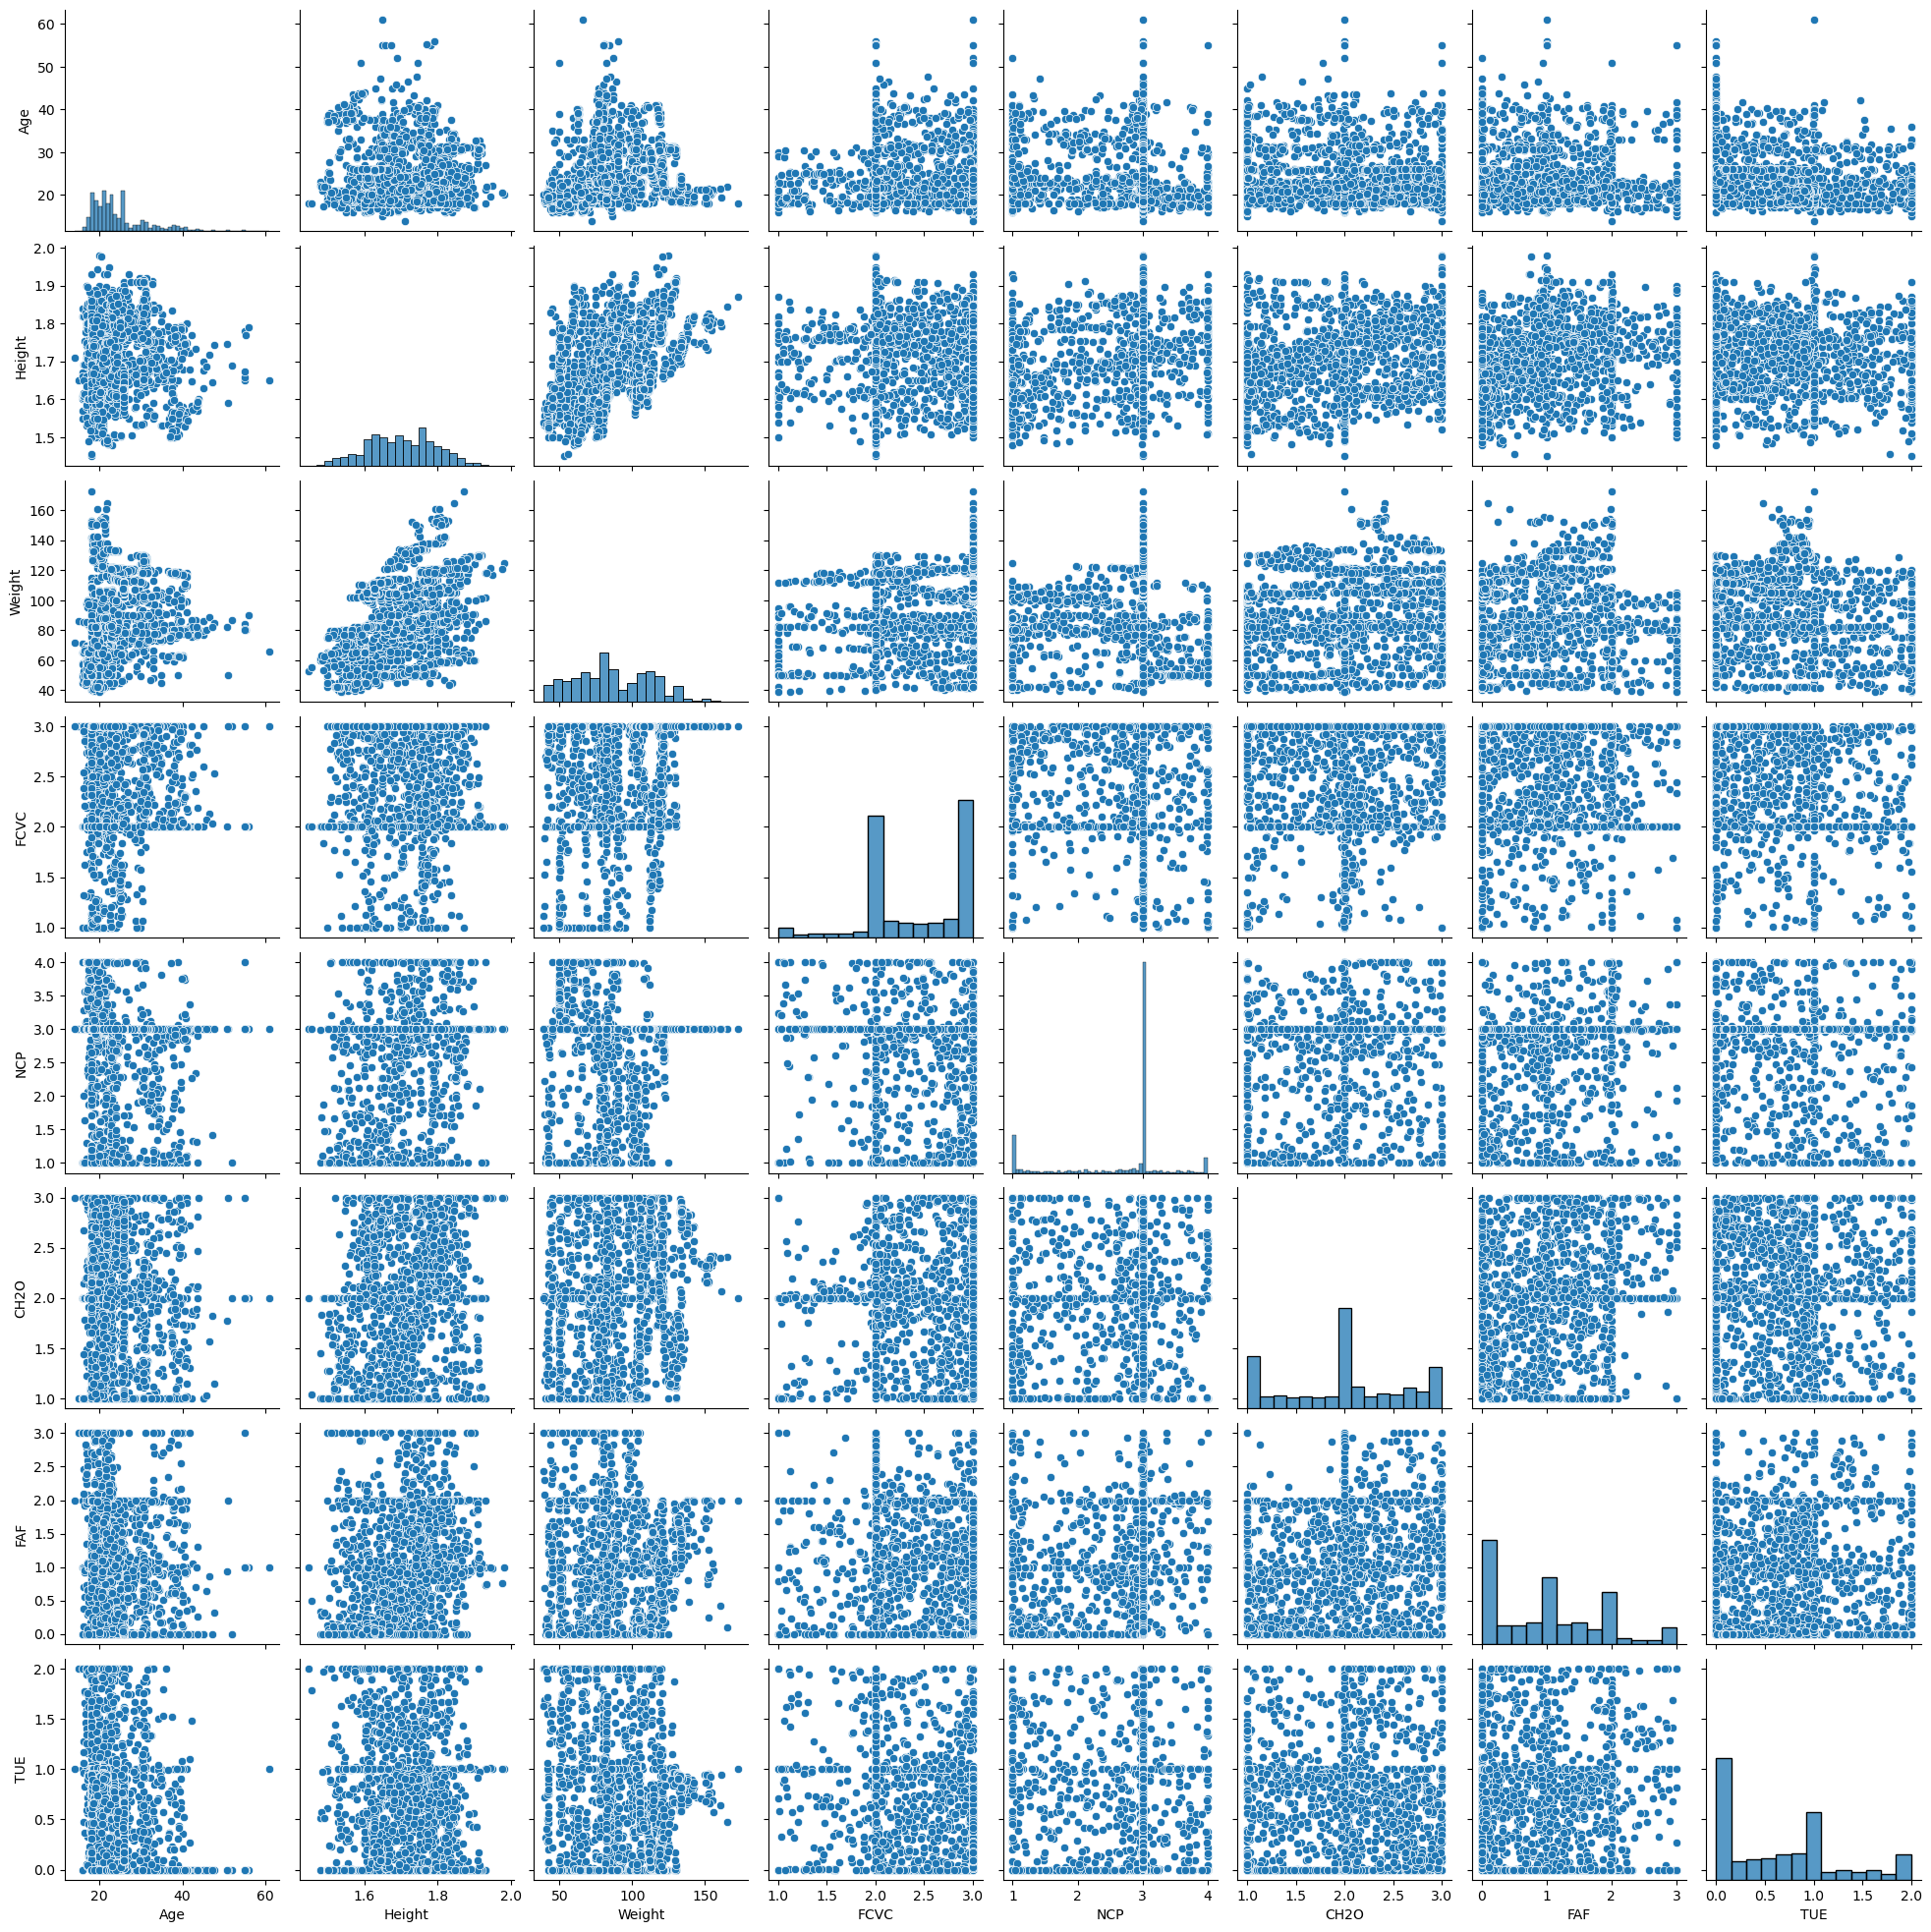

In [254]:
sns.pairplot(df)

# Linear Regression

In [256]:
model=LinearRegression() #created an instance of the linear regression

In [257]:
model.fit(X_train,Y_train) #fitting the model

LinearRegression()

In [258]:
Y_predict_test=model.predict(X_test)
Y_predict_train=model.predict(X_train)

In [262]:
print(f'coefficient_beta :{model.coef_}')
print(f'intercept_c:{model.intercept_}')

coefficient_beta :[-0.00706522 -0.49965981 -2.13161867  0.04949168 -0.21745379  0.4592791
  0.67177717  0.30779666 -0.75680758 -0.29210852 -0.05345425 -0.20417041
 -0.18281614  0.06079169  0.00566097  0.0422627 ]
intercept_c:5.4050676081974505


In [263]:
mse=mean_squared_error(y_test,y_predict_test)
print('mse is :',mse)

mse is : 2.1487480072738285


In [264]:
r2s=r2_score(y_test,y_predict_test)
print('r2 score is:',r2s)

r2 score is: 0.4623637886425753


# Polynomial Regression

In [265]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression with Degree 2

In [267]:
# Specify the degree of polynomial features
degree = 2

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)

# Transform the training and testing data with polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train)

# Make predictions on the training and testing data
Y_train_pred_poly = model_poly.predict(X_train_poly)
Y_test_pred_poly = model_poly.predict(X_test_poly)

# Calculate evaluation metrics
mse_poly = mean_squared_error(Y_test, Y_test_pred_poly)
r2_poly = r2_score(Y_test, Y_test_pred_poly)

# Calculate RMSE for training and testing data
rmse_train_poly = np.sqrt(mean_squared_error(Y_train, Y_train_pred_poly))
rmse_test_poly = np.sqrt(mean_squared_error(Y_test, Y_test_pred_poly))

print("Mean Squared Error (Polynomial):", mse_poly)
print("R-squared (Polynomial):", r2_poly)
print("RMSE - Training Data (Polynomial):", rmse_train_poly)
print("RMSE - Testing Data (Polynomial):", rmse_test_poly)

Mean Squared Error (Polynomial): 0.9246795032767562
R-squared (Polynomial): 0.7685507226085865
RMSE - Training Data (Polynomial): 0.7770796152912962
RMSE - Testing Data (Polynomial): 0.9616025703359763


# Polynomial Regression with Degree 3

In [268]:
# Specify the degree of polynomial features
degree = 3

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)

# Transform the training and testing data with polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train)

# Make predictions on the training and testing data
Y_train_pred_poly = model_poly.predict(X_train_poly)
Y_test_pred_poly = model_poly.predict(X_test_poly)

# Calculate evaluation metrics
mse_poly = mean_squared_error(Y_test, Y_test_pred_poly)
r2_poly = r2_score(Y_test, Y_test_pred_poly)

# Calculate RMSE for training and testing data
rmse_train_poly = np.sqrt(mean_squared_error(Y_train, Y_train_pred_poly))
rmse_test_poly = np.sqrt(mean_squared_error(Y_test, Y_test_pred_poly))

print("Mean Squared Error (Polynomial):", mse_poly)
print("R-squared (Polynomial):", r2_poly)
print("RMSE - Training Data (Polynomial):", rmse_train_poly)
print("RMSE - Testing Data (Polynomial):", rmse_test_poly)

Mean Squared Error (Polynomial): 9.603398308836155
R-squared (Polynomial): -1.4037513443366518
RMSE - Training Data (Polynomial): 0.215568563364538
RMSE - Testing Data (Polynomial): 3.098935028172768


# Polynomial Regression with Degree 4

In [269]:
# Specify the degree of polynomial features
degree = 4

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)

# Transform the training and testing data with polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, Y_train)

# Make predictions on the training and testing data
Y_train_pred_poly = model_poly.predict(X_train_poly)
Y_test_pred_poly = model_poly.predict(X_test_poly)

# Calculate evaluation metrics
mse_poly = mean_squared_error(Y_test, Y_test_pred_poly)
r2_poly = r2_score(Y_test, Y_test_pred_poly)

# Calculate RMSE for training and testing data
rmse_train_poly = np.sqrt(mean_squared_error(Y_train, Y_train_pred_poly))
rmse_test_poly = np.sqrt(mean_squared_error(Y_test, Y_test_pred_poly))

print("Mean Squared Error (Polynomial):", mse_poly)
print("R-squared (Polynomial):", r2_poly)
print("RMSE - Training Data (Polynomial):", rmse_train_poly)
print("RMSE - Testing Data (Polynomial):", rmse_test_poly)

Mean Squared Error (Polynomial): 995340.3168066314
R-squared (Polynomial): -249134.83167689783
RMSE - Training Data (Polynomial): 0.00018511514378400583
RMSE - Testing Data (Polynomial): 997.6674379805283


In [24]:
target_count = df['NObeyesdad'].value_counts()
target_unique = df['NObeyesdad'].unique()

In [25]:
target_count

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [26]:
target_unique

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [32]:
fig = px.pie(values= target_count, names = target_unique,
             color_discrete_sequence=px.colors.qualitative.Pastel,
             title = "Number of people from each type of Obesity Level")

fig.show()

#### 

# Creating New DataFrames

In [34]:
df_OT1 = df[df["NObeyesdad"] == 'Obesity_Type_I' ]
df_OT2 = df[df["NObeyesdad"] == 'Obesity_Type_II']
df_OT3 = df[df["NObeyesdad"] == 'Obesity_Type_III']

In [36]:
df_OT_Final = pd.concat([df_OT1,df_OT2,df_OT3]) 
df_OT_Final.reset_index(drop=True, inplace = True)

In [37]:
df_OW1 = df[df["NObeyesdad"]=='Overweight_Level_I']
df_OW2 = df[df["NObeyesdad"]=='Overweight_Level_II']

In [38]:
df_OW_Final = pd.concat([df_OW1,df_OW2])
df_OW_Final.reset_index(drop=True, inplace = True)

In [39]:
df_Normal = df[df["NObeyesdad"]=='Normal_Weight']

In [40]:
df_Insufficient = df[df["NObeyesdad"]=='Insufficient_Weight']

# Categorical Features

In [48]:
categorical_features = ['Gender','CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight',
                        'CAEC', 'MTRANS']

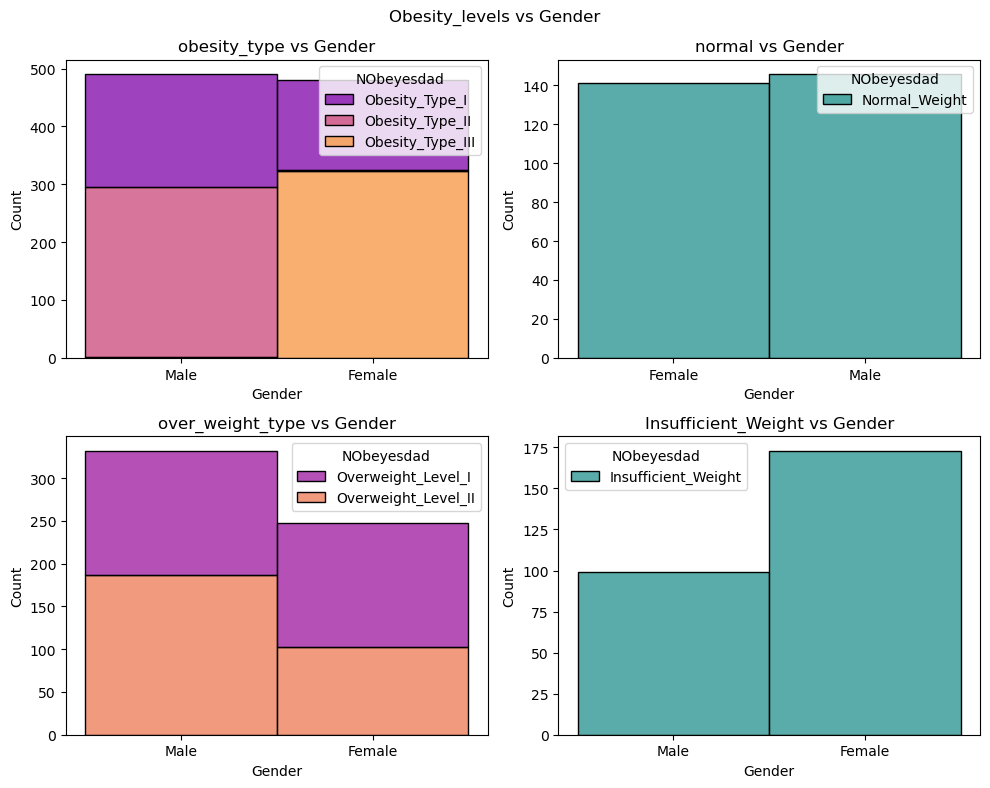

In [57]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='Gender', hue='NObeyesdad',palette= 'plasma', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs Gender')
    
    sns.histplot(data=data_list[i+2], x='Gender', hue='NObeyesdad',palette= 'viridis', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs Gender')
    
fig.suptitle('Obesity_levels vs Gender')
plt.tight_layout()
plt.show()

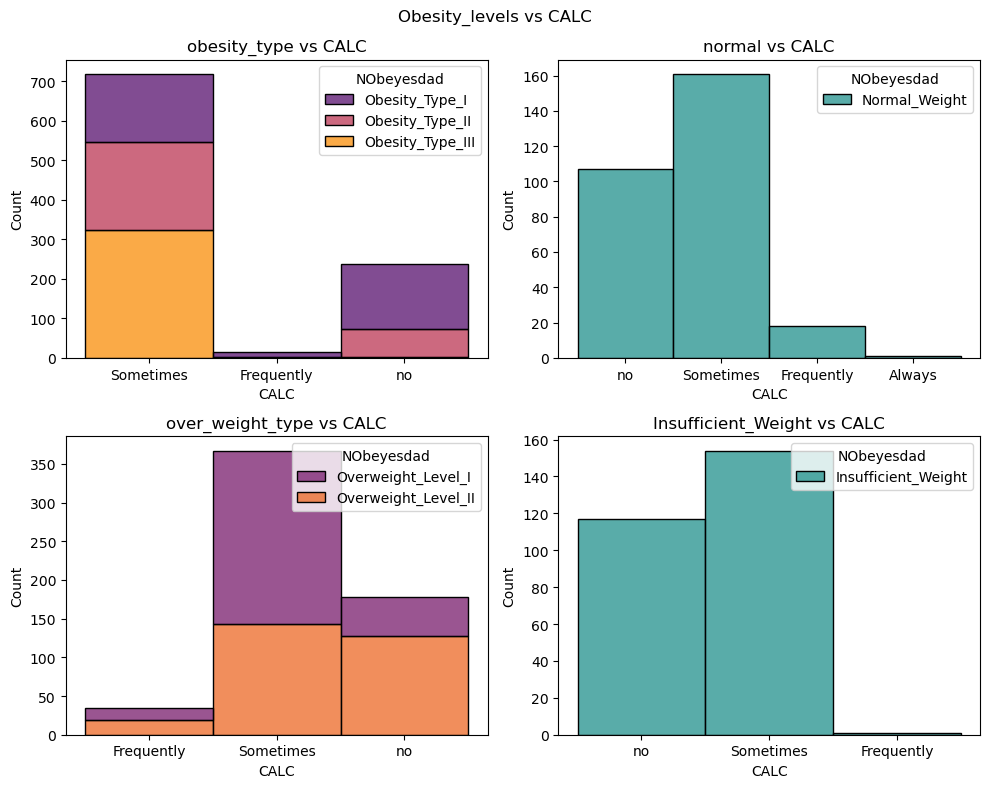

In [59]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='CALC', hue='NObeyesdad',palette= 'inferno', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs CALC')
    
    sns.histplot(data=data_list[i+2], x='CALC', hue='NObeyesdad',palette= 'viridis', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs CALC')
    
fig.suptitle('Obesity_levels vs CALC')
plt.tight_layout()
plt.show()

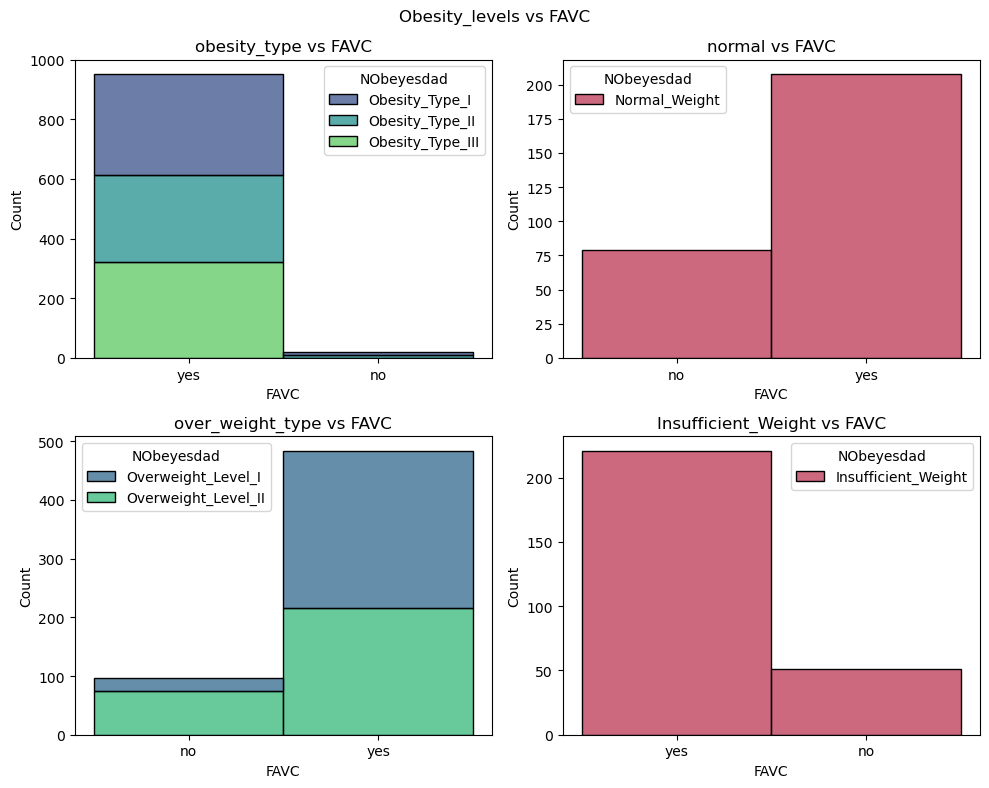

In [64]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='FAVC', hue='NObeyesdad',palette= 'viridis' ,ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs FAVC')
    
    sns.histplot(data=data_list[i+2], x='FAVC', hue='NObeyesdad', palette= 'inferno',ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs FAVC')
    
fig.suptitle('Obesity_levels vs FAVC')
plt.tight_layout()
plt.show()

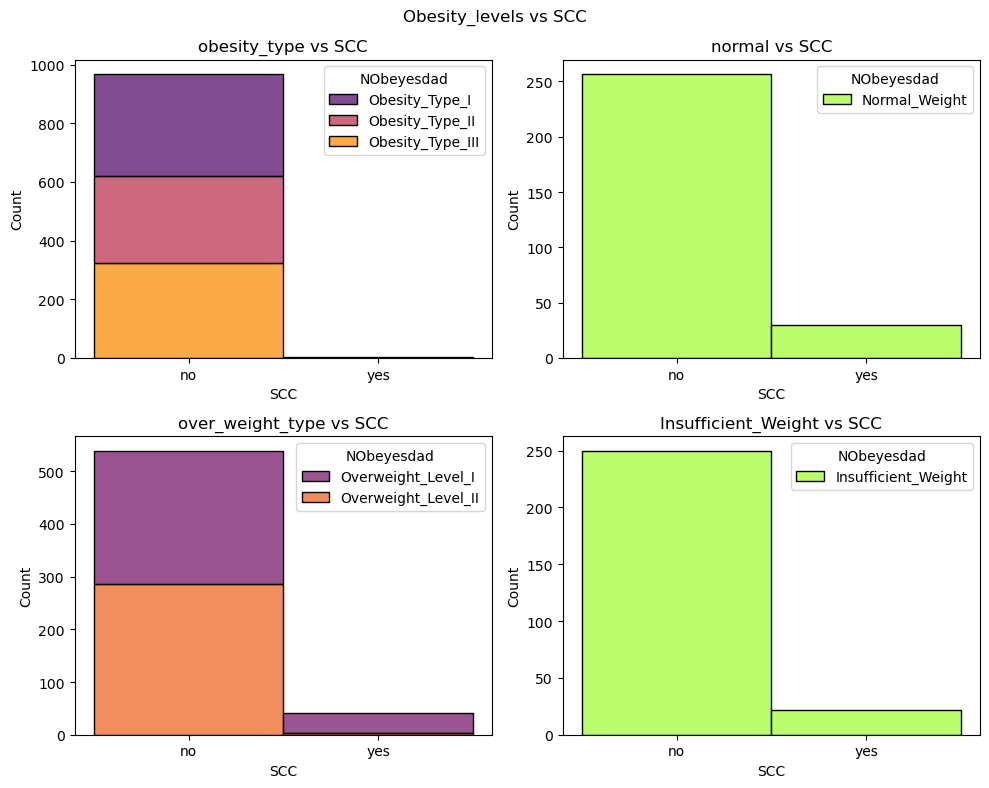

In [68]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='SCC', hue='NObeyesdad',palette= 'inferno', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs SCC')
    
    sns.histplot(data=data_list[i+2], x='SCC', hue='NObeyesdad',palette = "turbo" ,ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs SCC')
    
fig.suptitle('Obesity_levels vs SCC')
plt.tight_layout()
plt.show()

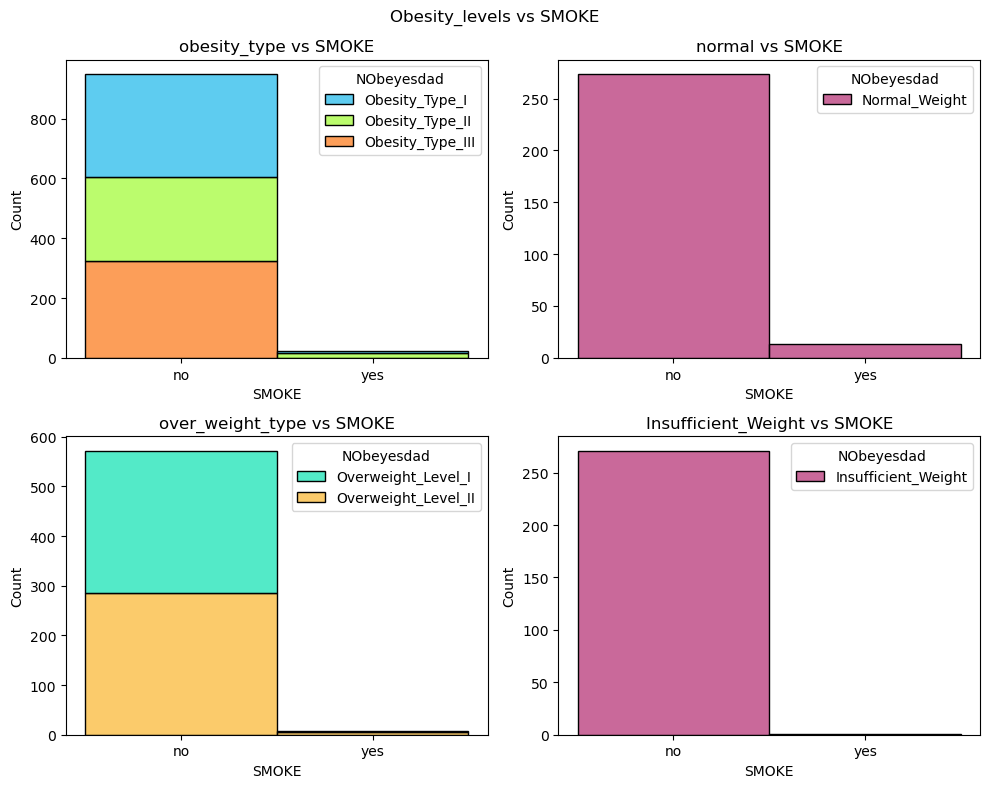

In [70]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='SMOKE', hue='NObeyesdad', palette= 'turbo',ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs SMOKE')
    
    sns.histplot(data=data_list[i+2], x='SMOKE', hue='NObeyesdad', palette= 'magma',ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs SMOKE')
    
fig.suptitle('Obesity_levels vs SMOKE')
plt.tight_layout()
plt.show()

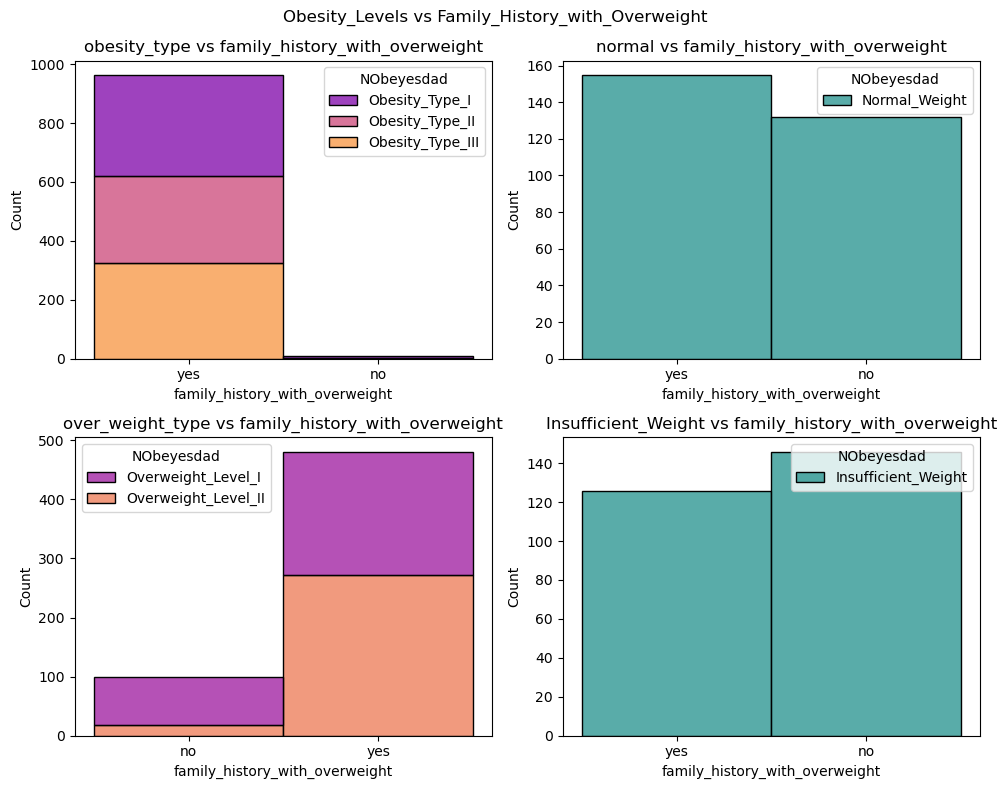

In [74]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='family_history_with_overweight', hue='NObeyesdad',palette= 'plasma', ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs family_history_with_overweight')
    
    sns.histplot(data=data_list[i+2], x='family_history_with_overweight', hue='NObeyesdad',palette= 'viridis', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs family_history_with_overweight')
    
fig.suptitle('Obesity_Levels vs Family_History_with_Overweight')
plt.tight_layout()
plt.show()


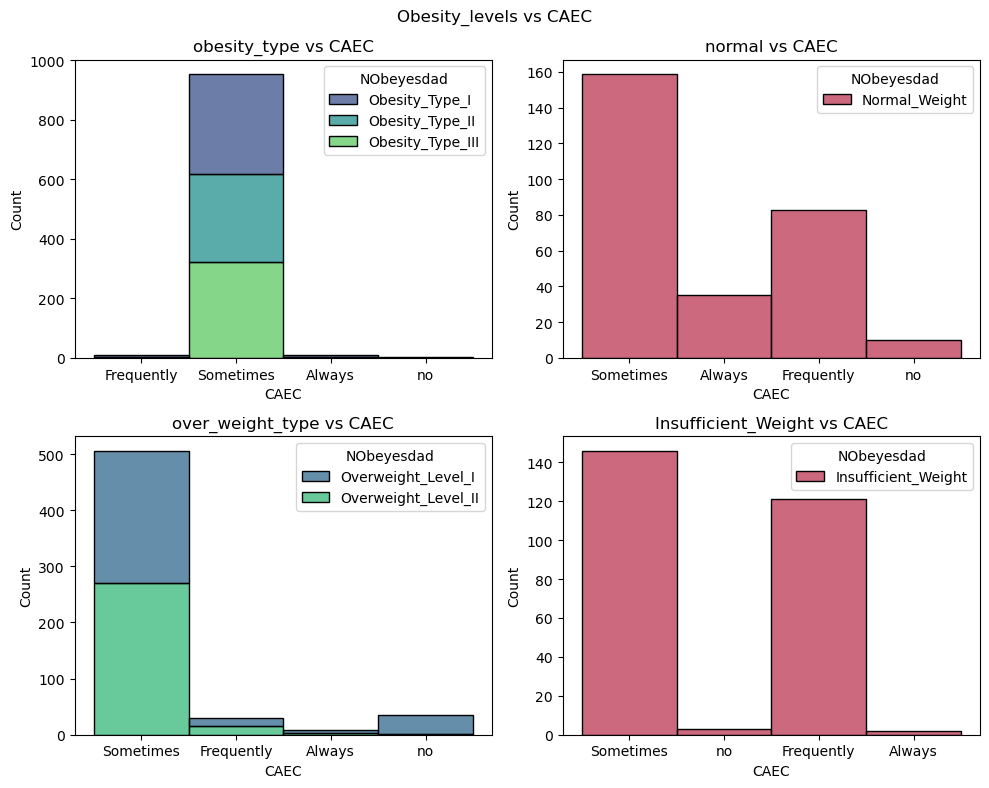

In [76]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(10,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='CAEC', hue='NObeyesdad', palette= 'viridis',ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs CAEC')
    
    sns.histplot(data=data_list[i+2], x='CAEC', hue='NObeyesdad', palette= 'inferno',ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs CAEC')
    
fig.suptitle('Obesity_levels vs CAEC')
plt.tight_layout()
plt.show()

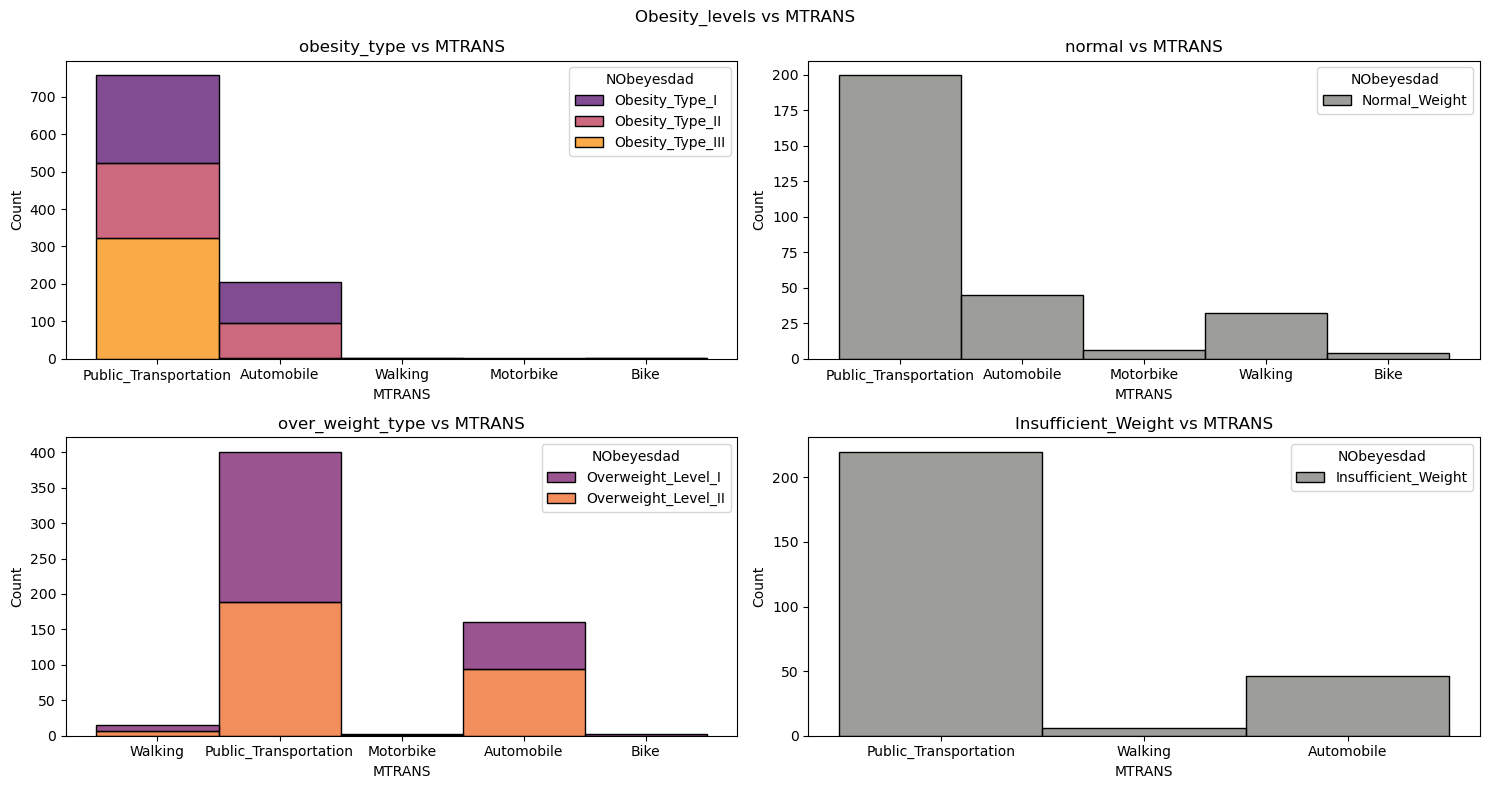

In [82]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]

data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig, axes = plt.subplots(figsize=(15,8),nrows = 2 , ncols =2)

for i in range(2):
    
    sns.histplot(data=data_list[i], x='MTRANS', hue='NObeyesdad', palette= 'inferno',ax=axes[i, 0], multiple='stack')
    axes[i,0].set_title(f'{data_name[i]} vs MTRANS')
    
    sns.histplot(data=data_list[i+2], x='MTRANS', hue='NObeyesdad',palette= 'cividis', ax=axes[i, 1], multiple='stack')
    axes[i,1].set_title(f'{data_name[i+2]} vs MTRANS')
    
fig.suptitle('Obesity_levels vs MTRANS')
plt.tight_layout()
plt.show()

# Continuous Features

In [84]:
continuous_features = ['Age', 'Height', 'Weight','FCVC', "NCP", 'CH2O' ,'FAF', 'TUE']

# Box Plot of Continuous Features

In [85]:
fig = make_subplots(rows = 8, cols = 1)

for i in range(len(continuous_features)):
    
    fig.add_trace(go.Box(x= df[continuous_features[i]], name = continuous_features[i]), row = i+1, col =1)
    
    
fig.update_layout(height = 3000, width = 1000)
fig.show()

# KDE (Kernel Density Estimation) Plot for Continuous Variables

### Age

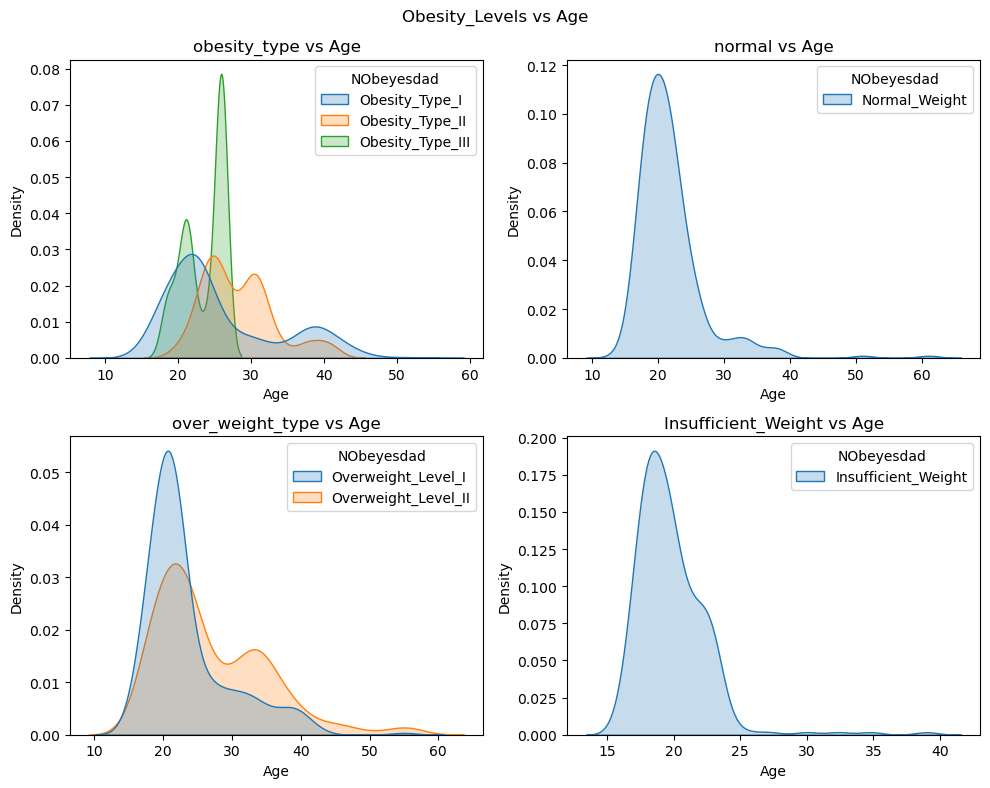

In [86]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs Age')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="Age", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs Age')
    
    
    
fig.suptitle('Obesity_Levels vs Age')
plt.tight_layout()
plt.show()

### Height

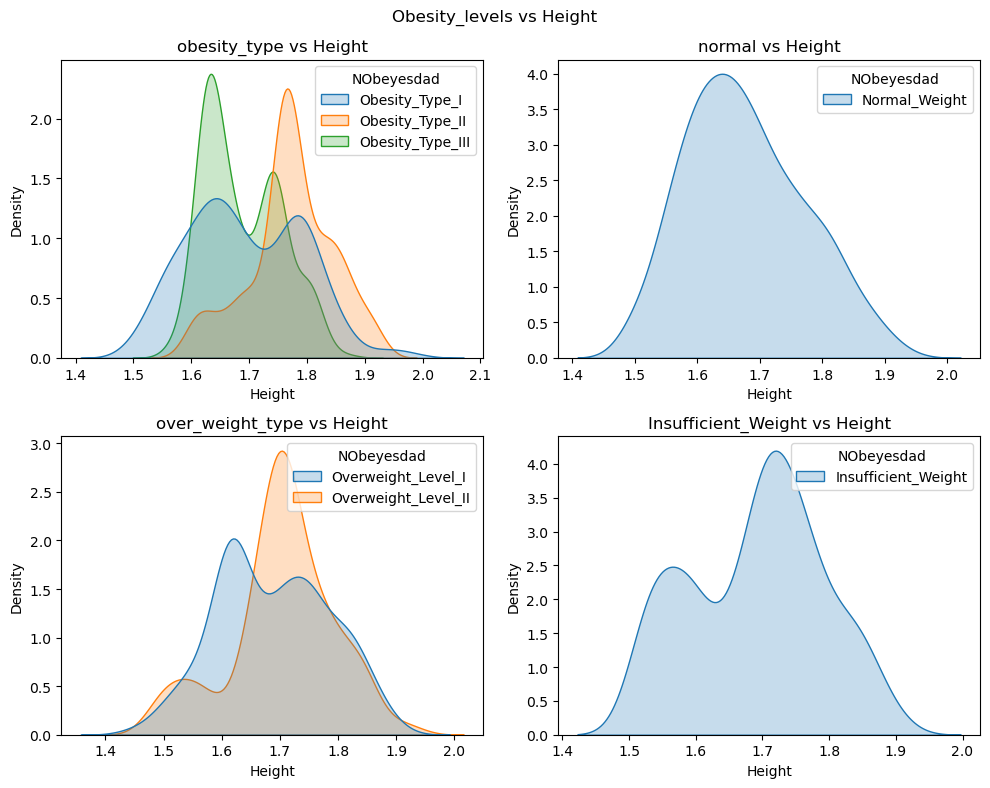

In [89]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="Height", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs Height')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="Height", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs Height')
    
    
    
fig.suptitle('Obesity_levels vs Height')
plt.tight_layout()
plt.show()

### Weight

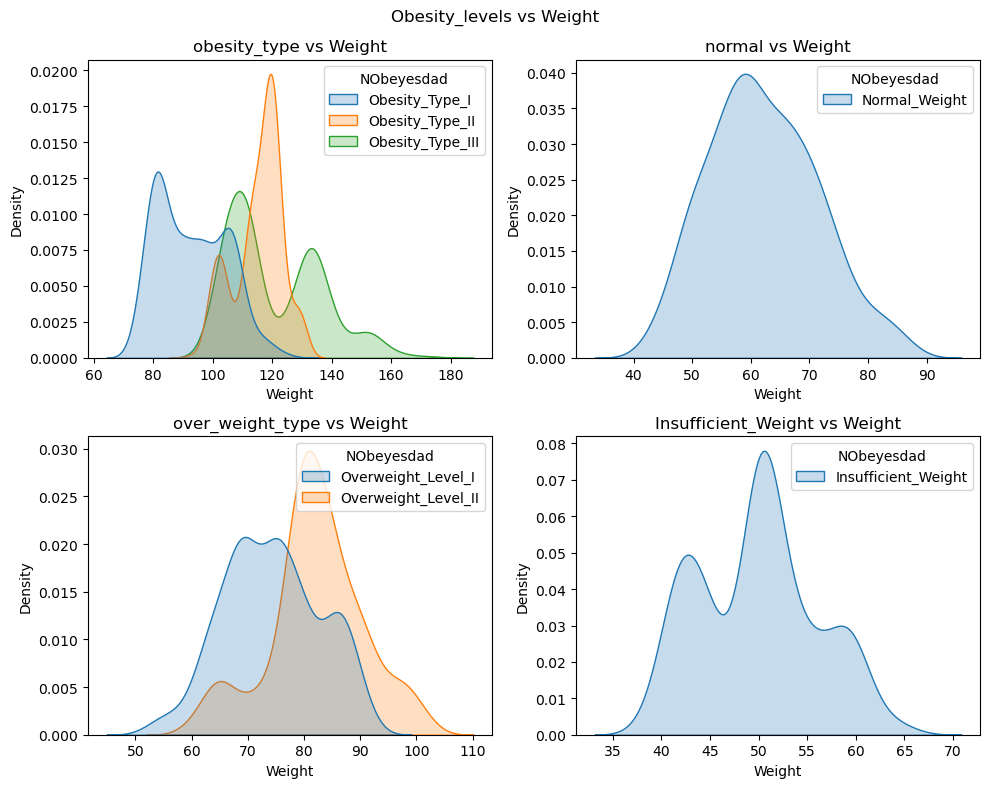

In [90]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="Weight", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs Weight')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="Weight", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs Weight')
    
    
    
fig.suptitle('Obesity_levels vs Weight')
plt.tight_layout()
plt.show()

### FCVC

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3864\2560959924.py:8: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



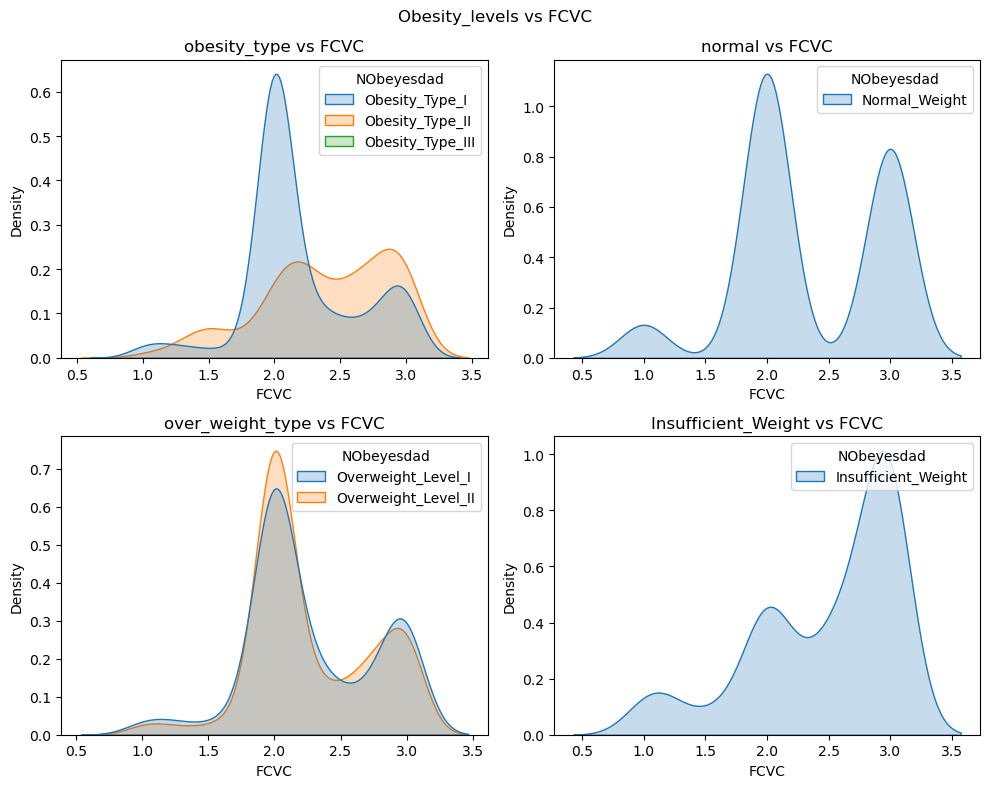

In [91]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="FCVC", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs FCVC')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="FCVC", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs FCVC')
    
    
    
fig.suptitle('Obesity_levels vs FCVC')
plt.tight_layout()
plt.show()

### NCP

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3864\3871389188.py:8: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



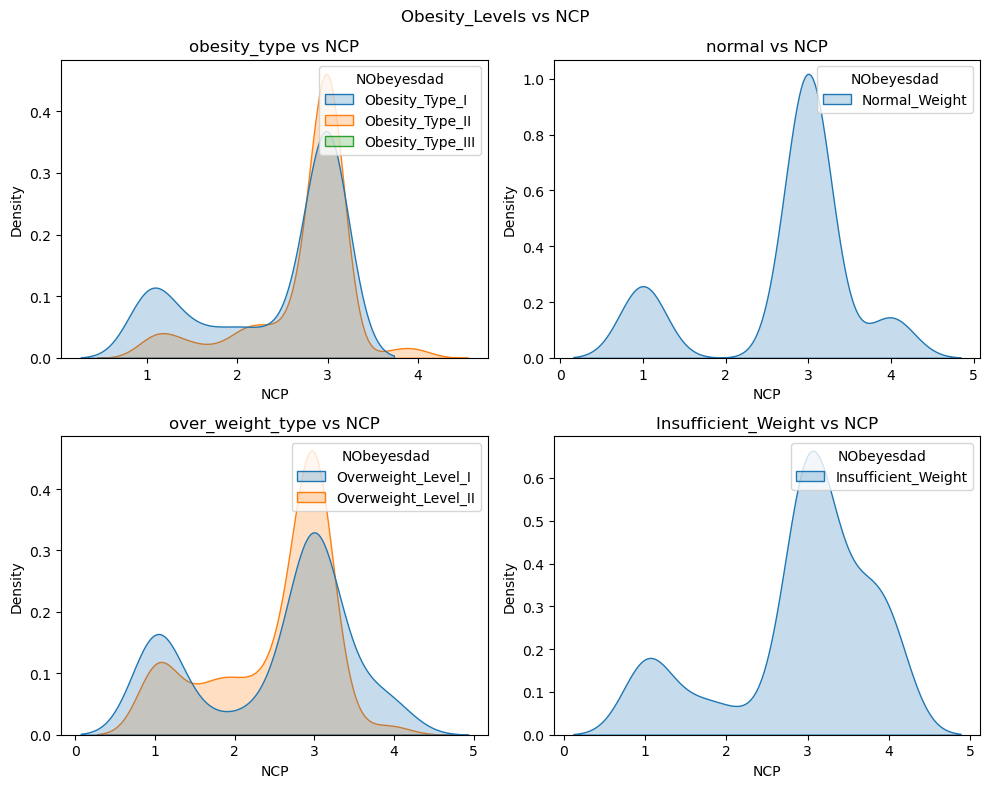

In [95]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="NCP", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs NCP')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="NCP", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs NCP')
    
    
    
fig.suptitle('Obesity_Levels vs NCP')
plt.tight_layout()
plt.show()

### CH2O

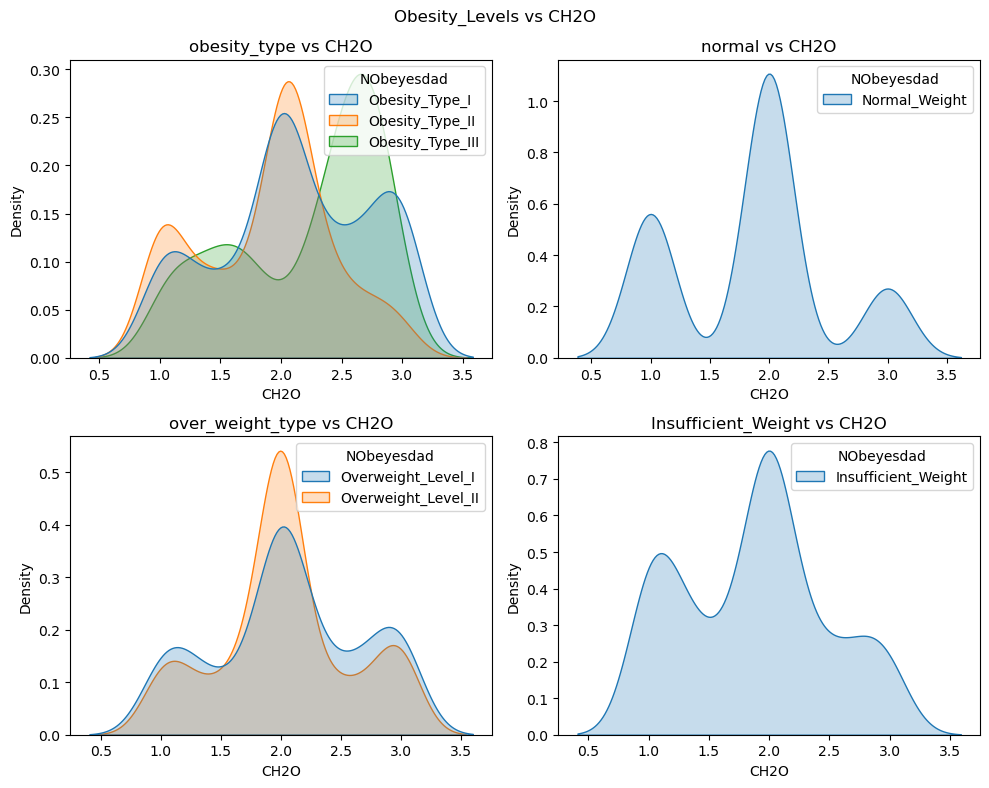

In [94]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="CH2O", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs CH2O')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="CH2O", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs CH2O')
    
    
    
fig.suptitle('Obesity_Levels vs CH2O')
plt.tight_layout()
plt.show()

### FAF

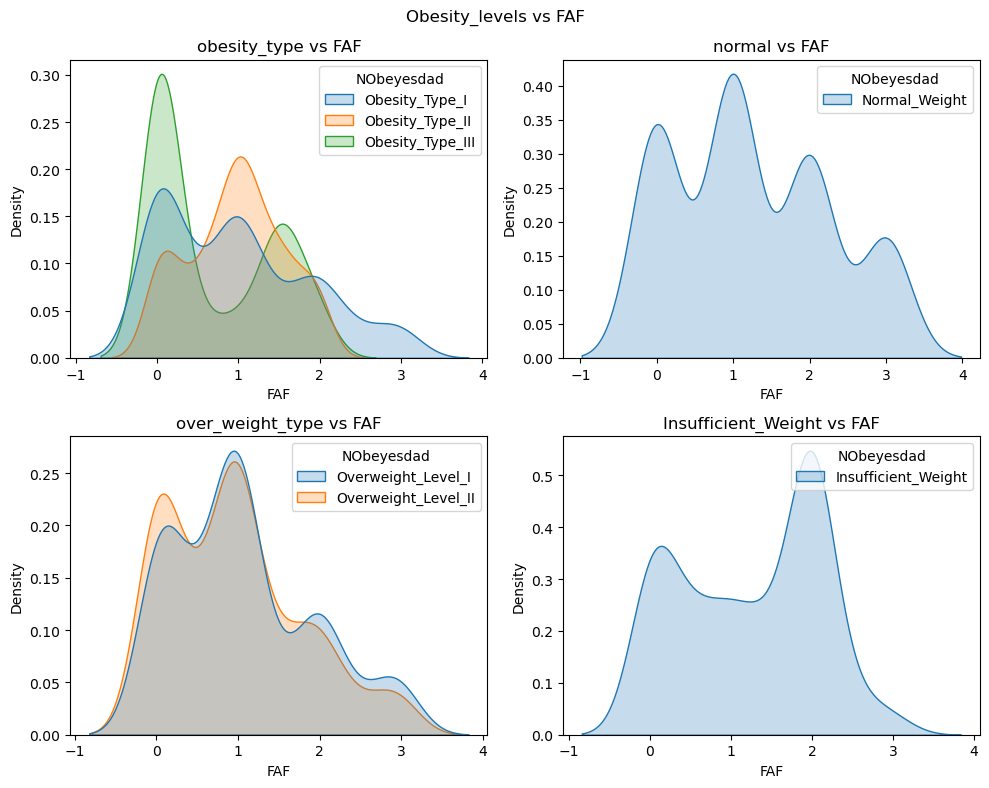

In [96]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="FAF", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs FAF')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="FAF", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs FAF')
    
    
    
fig.suptitle('Obesity_levels vs FAF')
plt.tight_layout()
plt.show()

### TUE

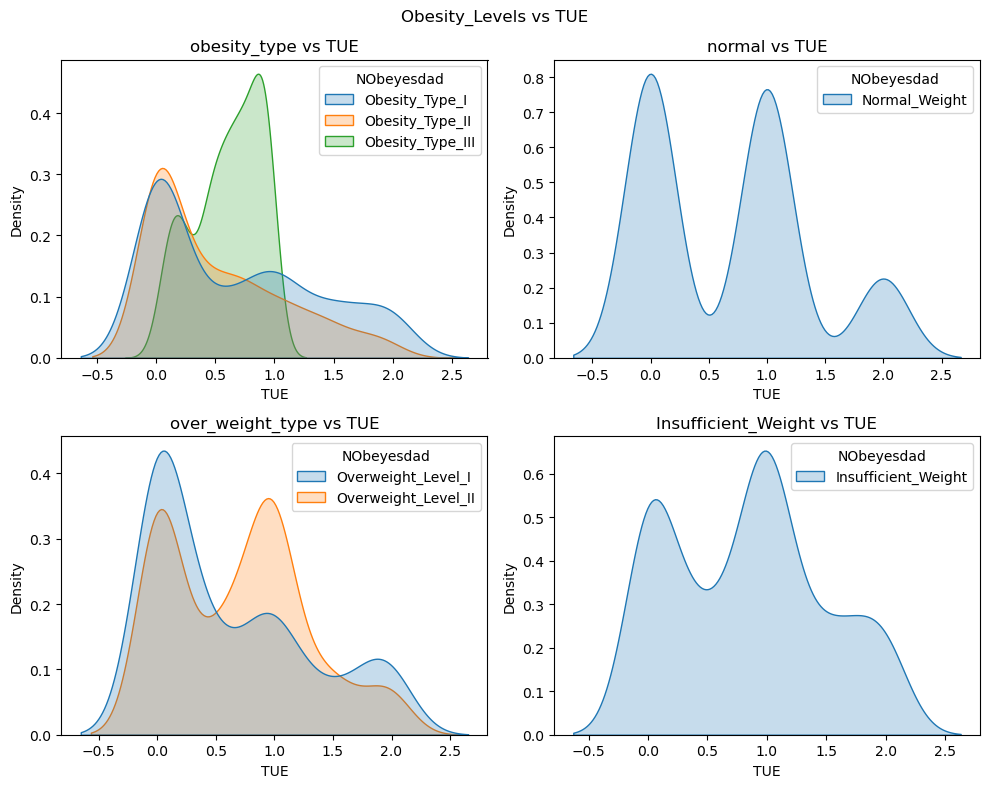

In [98]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name =["obesity_type", "over_weight_type", "normal", "Insufficient_Weight" ]

fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i in range(2):
    
    sns.kdeplot(ax = axes[i,0],data=data_list[i], x="TUE", hue="NObeyesdad", fill =True)
    axes[i, 0].set_title(f'{data_name[i]} vs TUE')
    
    sns.kdeplot(ax = axes[i,1],data=data_list[i+2], x="TUE", hue="NObeyesdad", fill =True)
    axes[i, 1].set_title(f'{data_name[i+2]} vs TUE')
    
    
    
fig.suptitle('Obesity_Levels vs TUE')
plt.tight_layout()
plt.show()

In [99]:
df1 = df.copy() #Creating a copy of the Dataframe df

In [100]:
df1.loc[df1['NObeyesdad'] == 'Normal_Weight', 'NObeyesdad'] = 2
df1.loc[df1['NObeyesdad'] == 'Overweight_Level_I', 'NObeyesdad'] = 3
df1.loc[df1['NObeyesdad'] == 'Overweight_Level_II', 'NObeyesdad'] = 4
df1.loc[df1['NObeyesdad'] == 'Obesity_Type_I', 'NObeyesdad'] = 5
df1.loc[df1['NObeyesdad'] == 'Insufficient_Weight', 'NObeyesdad'] = 6
df1.loc[df1['NObeyesdad'] == 'Obesity_Type_II', 'NObeyesdad'] = 7
df1.loc[df1['NObeyesdad'] == 'Obesity_Type_III', 'NObeyesdad'] = 8

# Gender

df1.loc[df1['Gender'] == 'Female', 'Gender'] = 2
df1.loc[df1['Gender'] == 'Male', 'Gender'] = 3

# family_history_with_overweight

df1.loc[df1['family_history_with_overweight'] == 'no', 'family_history_with_overweight'] = 2
df1.loc[df1['family_history_with_overweight'] == 'yes', 'family_history_with_overweight'] = 3

# FAVC

df1.loc[df1['FAVC'] == 'no', 'FAVC'] = 2
df1.loc[df1['FAVC'] == 'yes', 'FAVC'] = 3

# CAEC

df1.loc[df1['CAEC'] == 'no', 'CAEC'] = 2
df1.loc[df1['CAEC'] == 'Sometimes', 'CAEC'] = 3
df1.loc[df1['CAEC'] == 'Frequently', 'CAEC'] = 4
df1.loc[df1['CAEC'] == 'Always', 'CAEC'] = 5

# SMOKE

df1.loc[df1['SMOKE'] == 'no', 'SMOKE'] = 2
df1.loc[df1['SMOKE'] == 'yes', 'SMOKE'] = 3
        
# SCC

df1.loc[df1['SCC'] == 'no', 'SCC'] = 2
df1.loc[df1['SCC'] == 'yes', 'SCC'] = 3

# CALC

df1.loc[df1['CALC'] == 'no', 'CALC'] = 2
df1.loc[df1['CALC'] == 'Sometimes', 'CALC'] = 3
df1.loc[df1['CALC'] == 'Frequently', 'CALC'] = 4
df1.loc[df1['CALC'] == 'Always', 'CALC'] = 5

# MTRANS

df1.loc[df1['MTRANS'] == 'Automobile', 'MTRANS'] = 2
df1.loc[df1['MTRANS'] == 'Motorbike', 'MTRANS'] = 3
df1.loc[df1['MTRANS'] == 'Bike', 'MTRANS'] = 4
df1.loc[df1['MTRANS'] == 'Public_Transportation', 'MTRANS'] = 5
df1.loc[df1['MTRANS'] == 'Walking', 'MTRANS'] = 6


df1 = df1.astype('float64')

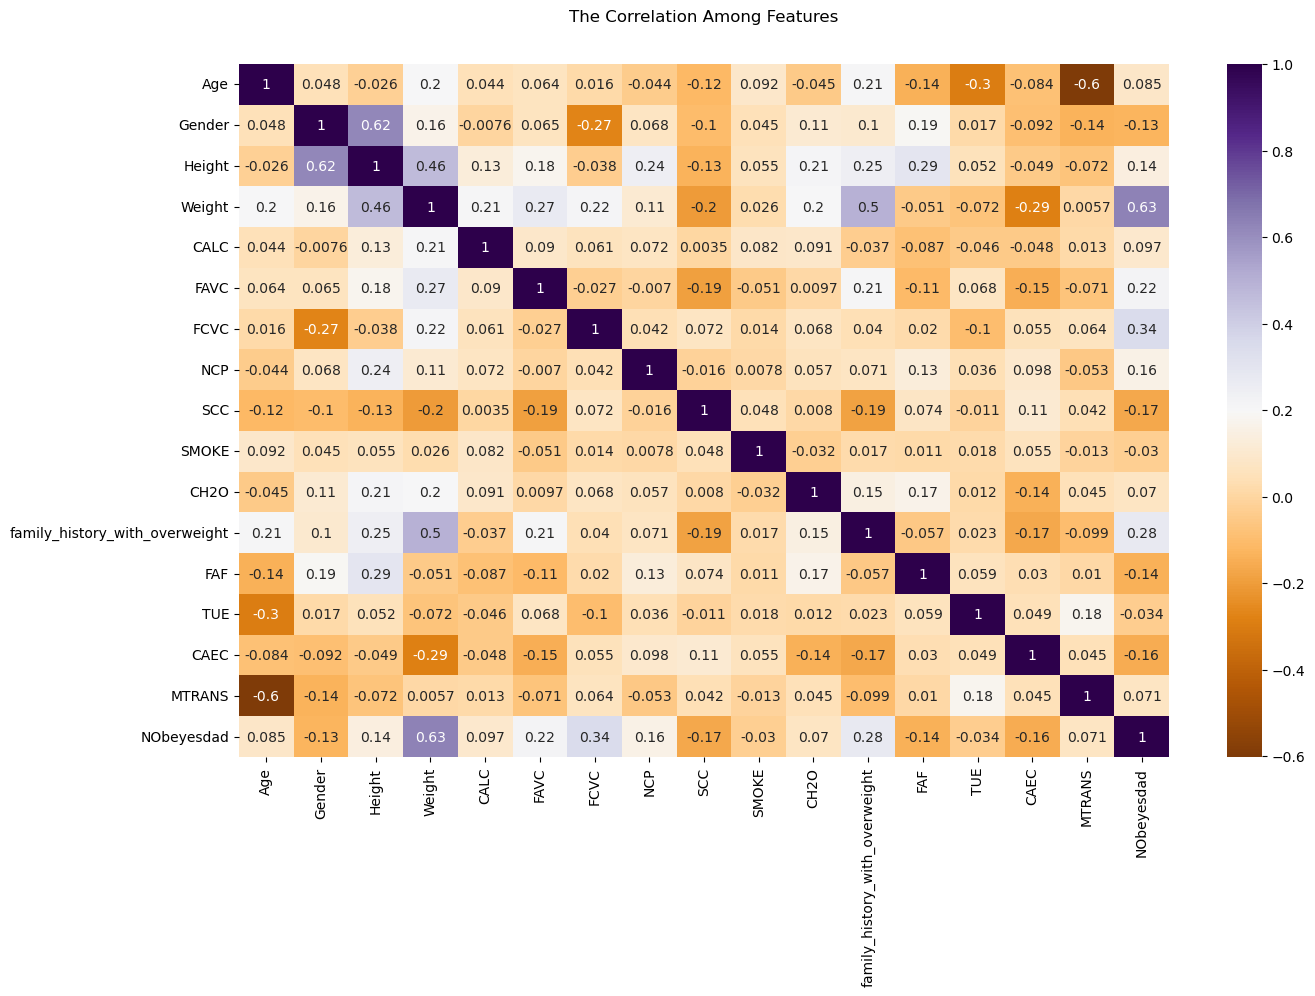

In [114]:
plt.figure(figsize=(15,9))
sns.heatmap(df1.corr(), annot = True, cmap = "PuOr")
plt.title('The Correlation Among Features',y= 1.05)
plt.show()

In [109]:
# There's a clear indication highly strong correlation between the weight and obesity levels

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3864\1687234439.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3864\1687234439.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3864\1687234439.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3864\1687234439.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




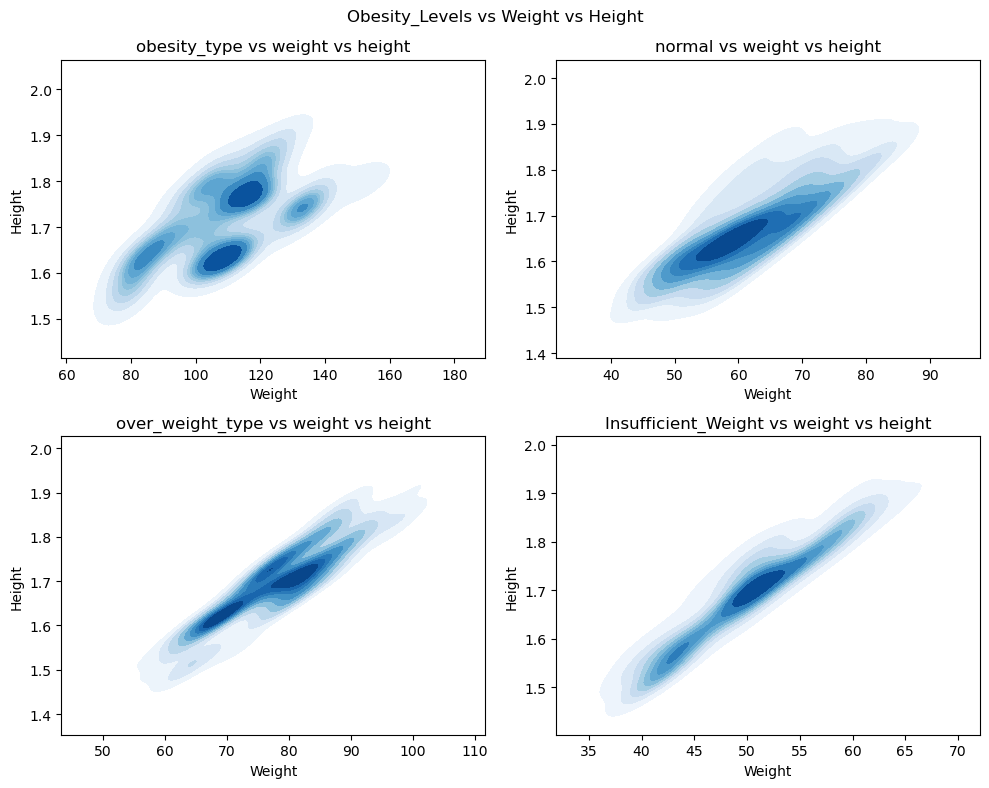

In [110]:
data_list = [df_OT_Final, df_OW_Final, df_Normal, df_Insufficient]
data_name = ["obesity_type", "over_weight_type", "normal", "Insufficient_Weight"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i in range(2):
    sns.kdeplot(data=data_list[i], x='Weight', y='Height', ax=axes[i, 0], color='b', shade=True, label='NObeyesdad',
                cmap="Blues", thresh=0.05)
    axes[i, 0].set_title(f'{data_name[i]} vs weight vs height')

    sns.kdeplot(data=data_list[i + 2], x='Weight', y='Height', ax=axes[i, 1], color='b', shade=True, label='NObeyesdad',
                cmap="Blues", thresh=0.05)
    axes[i, 1].set_title(f'{data_name[i + 2]} vs weight vs height')

fig.suptitle('Obesity_Levels vs Weight vs Height')
plt.tight_layout()
plt.show()

# SVM with Kernel Function (Linear)

In [209]:
X = df1.drop(columns=["NObeyesdad"], axis =1)
Y = df1["NObeyesdad"]

In [210]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=0)

In [271]:
classifier = svm.SVC(kernel='linear', C = 50)
classifier.fit(X_train, Y_train)

SVC(C=50, kernel='linear')

In [272]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
#comparing prediction made by model with the original label
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.9733412322274881


In [273]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)
#comparing prediction made by model with the original label
print('Accuracy score of the testing data : ',test_data_accuracy)

Accuracy score of the testing data :  0.9527186761229315


In [274]:
y_pred = classifier.predict(X_test)
confusion_matrix(Y_test,y_pred)
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  2.0  3.0  4.0  5.0  6.0  7.0  8.0  All
True                                             
2.0         51    4    0    0    3    0    0   58
3.0          2   53    3    0    0    0    0   58
4.0          0    5   52    1    0    0    0   58
5.0          0    0    0   70    0    0    0   70
6.0          1    0    0    0   53    0    0   54
7.0          0    0    0    0    0   60    0   60
8.0          0    0    0    0    0    1   64   65
All         54   62   55   71   56   61   64  423

# SVM with Kernel Function (Polynomial)

In [275]:
classifier = svm.SVC(kernel='poly', C = 50)
classifier.fit(X_train, Y_train)

SVC(C=50, kernel='poly')

In [276]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
#comparing prediction made by model with the original label
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.794431279620853


In [277]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)
#comparing prediction made by model with the original label
print('Accuracy score of the testing data : ',test_data_accuracy)

Accuracy score of the testing data :  0.7730496453900709


In [278]:
y_pred = classifier.predict(X_test)
confusion_matrix(Y_test,y_pred)
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  2.0  3.0  4.0  5.0  6.0  7.0  8.0  All
True                                             
2.0         26    9    1    0   22    0    0   58
3.0         11   32   12    2    1    0    0   58
4.0          7    8   35    7    0    1    0   58
5.0          0    4    5   59    0    2    0   70
6.0          2    0    0    0   52    0    0   54
7.0          0    0    0    1    0   59    0   60
8.0          0    0    0    0    0    1   64   65
All         46   53   53   69   75   63   64  423

# SVM with Kernel (Radial Bias) Function

In [222]:
classifier = svm.SVC(kernel='rbf', C = 50)
classifier.fit(X_train, Y_train)

SVC(C=50)

In [223]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)
#comparing prediction made by model with the original label
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7813981042654028


In [224]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, Y_test)
#comparing prediction made by model with the original label
print('Accuracy score of the testing data : ',test_data_accuracy)

Accuracy score of the testing data :  0.7304964539007093


In [231]:
y_pred = classifier.predict(X_test)
confusion_matrix(Y_test,y_pred)
pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted  2.0  3.0  4.0  5.0  6.0  7.0  8.0  All
True                                             
2.0         25   11    2    0   20    0    0   58
3.0          8   31   14    4    1    0    0   58
4.0          4   11   23   18    0    2    0   58
5.0          0    3    5   57    0    4    1   70
6.0          2    0    0    0   52    0    0   54
7.0          0    0    0    4    0   56    0   60
8.0          0    0    0    0    0    0   65   65
All         39   56   44   83   73   62   66  423

# Logistic Regression

In [161]:
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)

# Make predictions using Logistic Regression
logistic_predictions = logistic_classifier.predict(X_test)

# Calculate accuracy score for Logistic Regression
logistic_accuracy = accuracy_score(Y_test, logistic_predictions)
print('Logistic Regression Accuracy:', logistic_accuracy)

Logistic Regression Accuracy: 0.7186761229314421


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Logistic Regression/ with Kernal Function (Linear)

In [202]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear']}

# Initialize GridSearchCV with cross-validation 
grid_search = GridSearchCV(classifier, param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Initialize SVM classifier with the best hyperparameters
best_classifier = svm.SVC(**best_params)

# Train the best classifier on the entire training data
best_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = best_classifier.predict(X_test)

# Calculate accuracy score on the test set
test_accuracy = accuracy_score(Y_test, Y_pred)
print('Best Hyperparameters:', best_params)
print('Accuracy on Test Set:', test_accuracy)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\util

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\util

Best Hyperparameters: {'C': 100, 'kernel': 'linear'}
Accuracy on Test Set: 0.9621749408983451


# Logistic Regression/ with Kernal Function (Polynomial)

In [220]:
from sklearn.model_selection import train_test_split, GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly']}

# Initialize GridSearchCV with cross-validation 
grid_search = GridSearchCV(classifier, param_grid, cv=10)

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Initialize SVM classifier with the best hyperparameters
best_classifier = svm.SVC(**best_params)

# Train the best classifier on the entire training data
best_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = best_classifier.predict(X_test)

# Calculate accuracy score on the test set
test_accuracy = accuracy_score(Y_test, Y_pred)
print('Best Hyperparameters:', best_params)
print('Accuracy on Test Set:', test_accuracy)

Best Hyperparameters: {'C': 100, 'kernel': 'poly'}
Accuracy on Test Set: 0.7801418439716312


# Decision Tree Classifier

In [282]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of the decision tree model: {accuracy:.4f}")

Accuracy of the decision tree model: 0.9267
